In [9]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

https://www.cs.upc.edu/~rferrericancho/linguistic_and_cognitive_networks.html

In [2]:
G=nx.Graph()

In [3]:
G.add_node(1)

In [4]:
G.add_nodes_from([1,2,4,5,7,9])

In [35]:
N.remove_node(2)

In [6]:
G.add_edge(1,3)
G.add_edges_from([(1,4),(4,5),(7,9)])

In [7]:
G.nodes()
G.edges()

[(1, 3), (1, 4), (4, 5), (7, 9)]

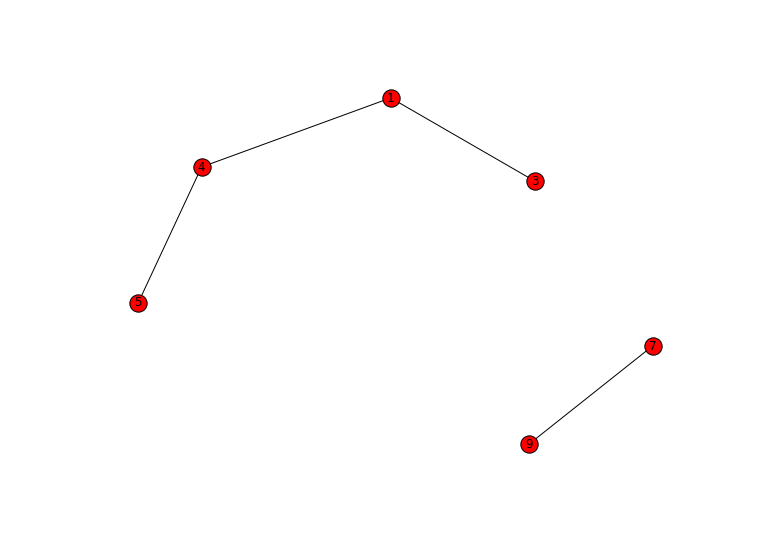

In [15]:
plt.figure(figsize=(10, 7))
nx.draw(G, with_labels = True)
plt.show()

In [14]:
G.degree(1) #количество соседей, степень
G.neighbors(1) #соседи 

[3, 4]

In [16]:
for node in G.nodes():
    print(node, G.degree(node))

1 2
3 1
4 2
5 1
7 1
9 1


In [17]:
G.add_edge(1,3,weight=4)

In [18]:
nx.write_gexf(G,'graph.gexf')

In [37]:
N = nx.read_gexf("graph.gexf")

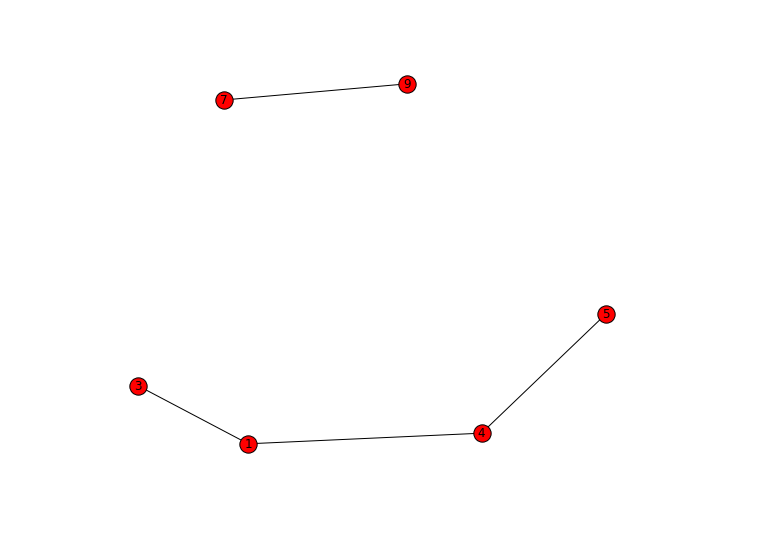

In [38]:
plt.figure(figsize=(10, 7))
nx.draw(N, with_labels = True)
plt.show()

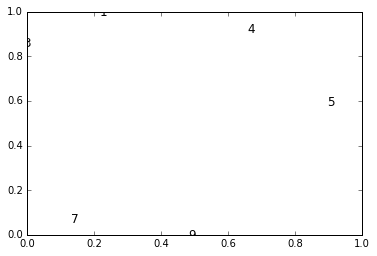

In [39]:
pos = nx.spring_layout(N)
nx.draw_networkx_labels(N,pos)
plt.show()

In [40]:
N.add_edges_from([(4,9),(7,5),(5,9)])

KeyError: 4

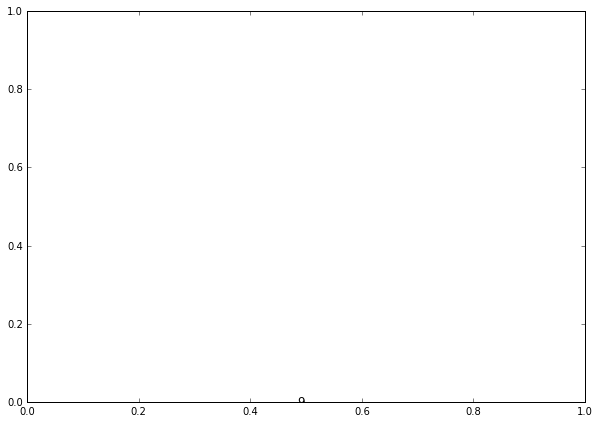

In [42]:
plt.figure(figsize=(10, 7))
#nx.draw_networkx_nodes(N, pos, with_labels = True)
nx.draw_networkx_labels(N, pos)
nx.draw_networkx_edges(N, pos, edge_color="Yellow")
plt.show()

In [43]:
N.number_of_nodes()

10

In [44]:
nx.density(N)

0.15555555555555556

In [45]:
N.number_of_edges()

7

In [46]:
nx.average_clustering(N)

0.0

In [48]:
deg = nx.degree_centrality(N)
for i in sorted(deg, key = deg.get, reverse=True):
    print(i, deg[i])
    

5 0.2222222222222222
9 0.2222222222222222
4 0.2222222222222222
1 0.2222222222222222
9 0.1111111111111111
4 0.1111111111111111
7 0.1111111111111111
5 0.1111111111111111
7 0.1111111111111111
3 0.1111111111111111


http://konect.uni-koblenz.de/
Дельфины
http://konect.uni-koblenz.de/networks/dolphins

In [56]:
D = nx.Graph()
d = open(r"/home/mi_air/Desktop/dolphins/out.dolphins.txt", "r", encoding="utf8")
for line in d:
    if "%" not in line:
        sp = line.split("\t")
        i = sp[0]
        j = sp[1].strip("\n")
        #print(i,j)
        D.add_edge(i,j)
        if i in D.nodes():
            pass
        else:
            D.add_node(i)
        if j in D.nodes():
            pass
        else:
            D.add_node(j)
        

        

In [57]:
D.number_of_nodes()

62

In [59]:
D.number_of_edges()

159

In [60]:
nx.average_clustering(D)

0.2589582460550203

In [61]:
nx.density(D)

0.08408249603384453

In [62]:
nx.write_gexf(D,'dolphins.gexf')

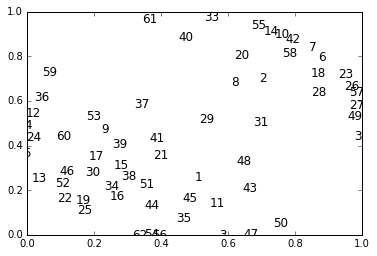

In [63]:
pos = nx.spring_layout(D)
nx.draw_networkx_labels(D,pos)
plt.show()

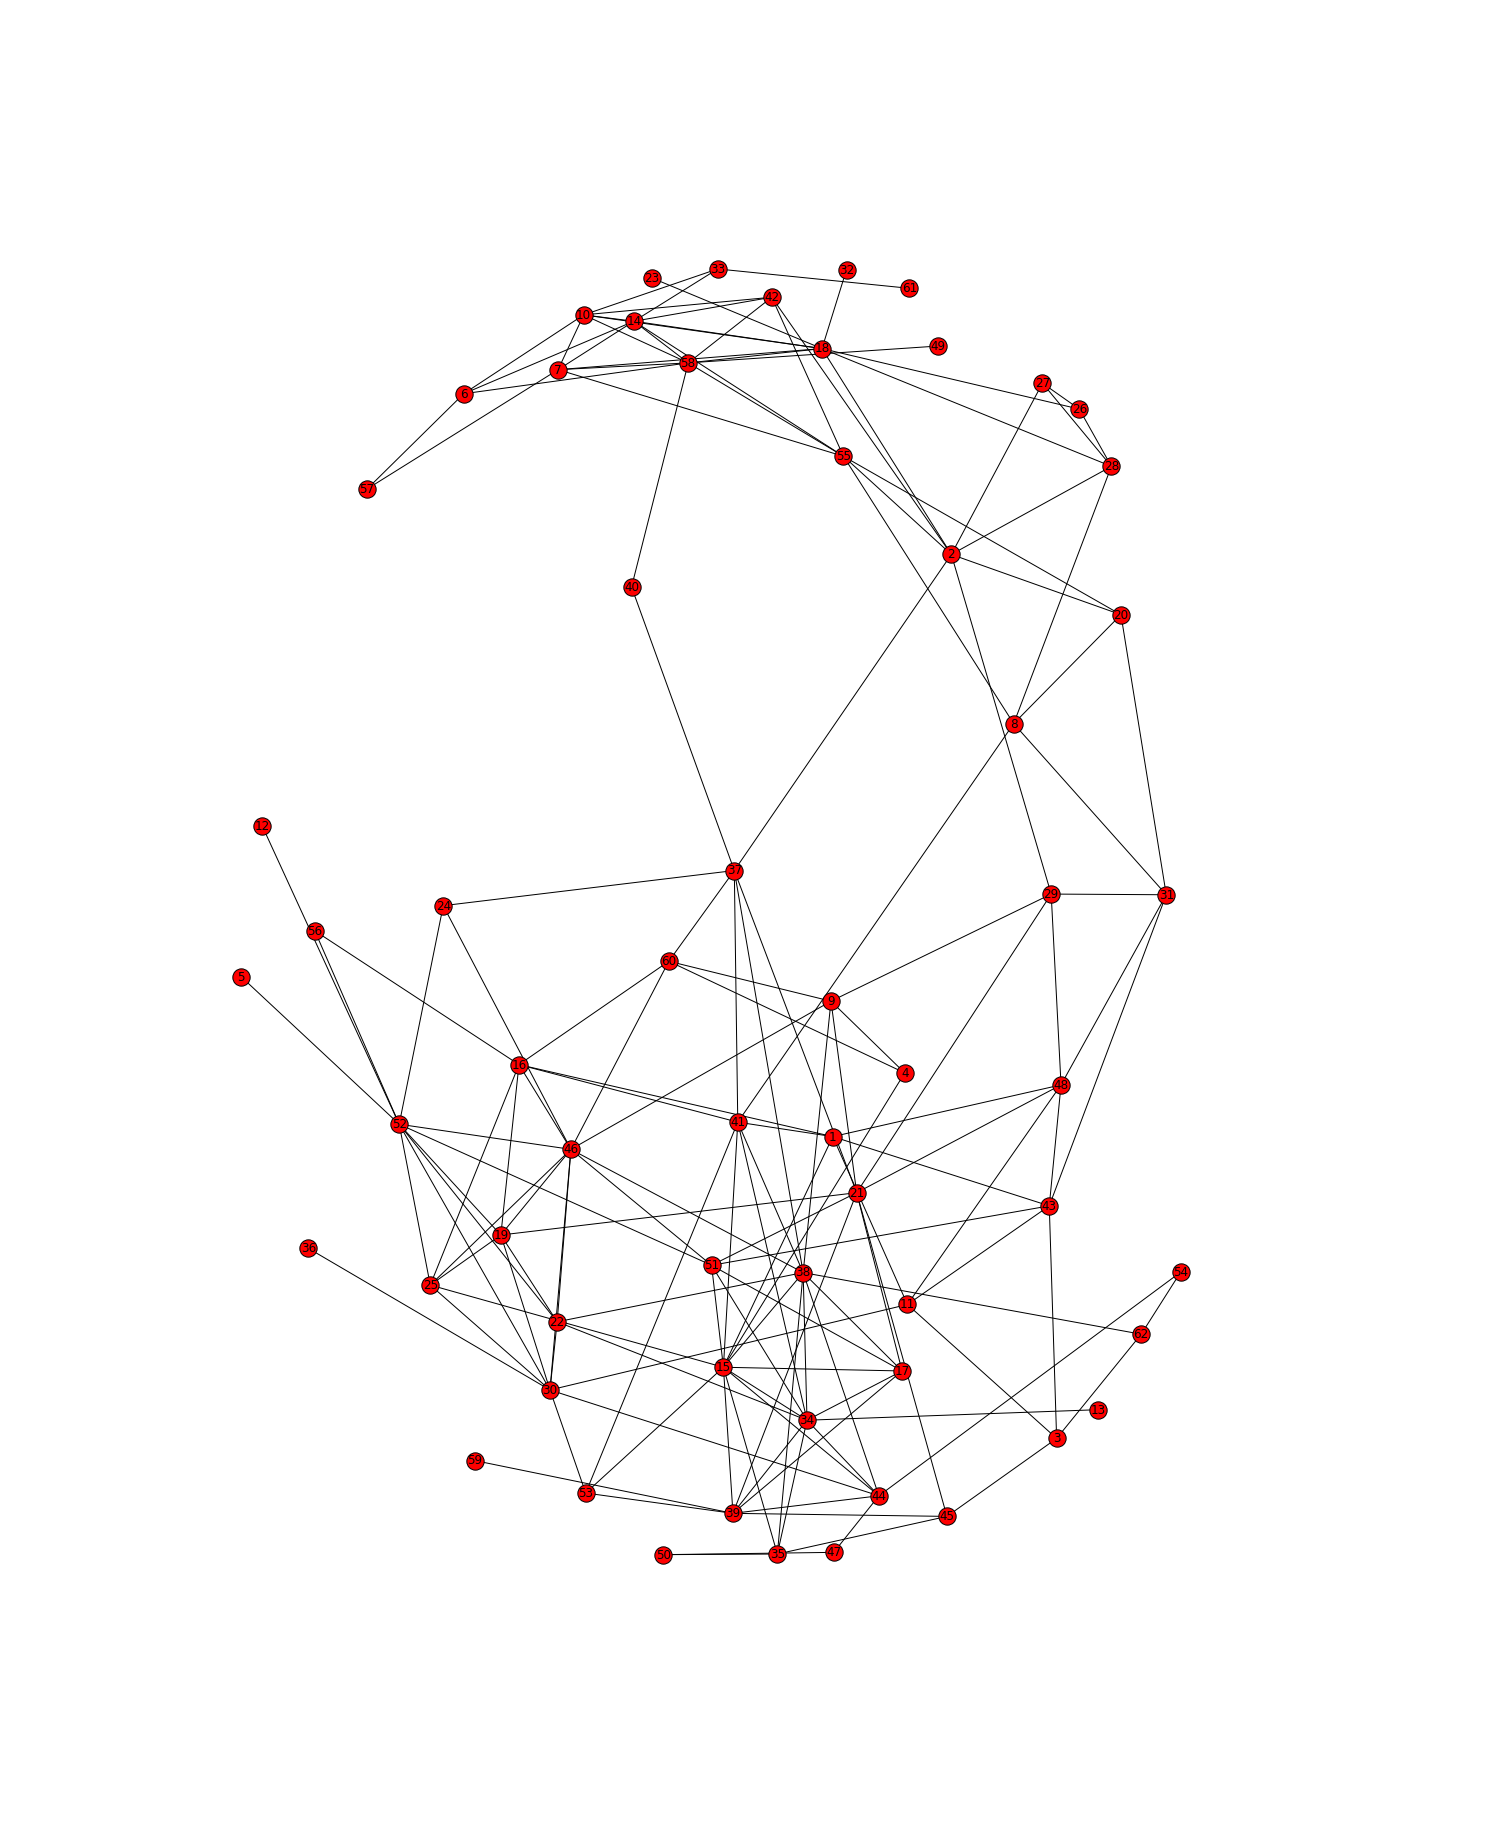

In [64]:
plt.figure(figsize=(20, 25))
nx.draw(D, with_labels = True)
plt.show()

In [73]:
corpus = open(r"/media/mi_air/0F0B7DDE62EEA81E/Downloads/news_rnc.txt", "r", encoding="utf8")
lst = []
for line in corpus:
    if "/S," in line:
        lst.append(line.split("/")[1])

In [74]:
len(lst)

9305

In [75]:
W = nx.Graph()

In [76]:
for i in range(len(lst)):
    if i < 3:
        W.add_nodes_from([lst[0],lst[1],lst[2]])
        W.add_edges_from([(lst[0],lst[1]),(lst[0],lst[2]),(lst[1],lst[2])])
                
    elif i> len(lst)-3:
        if lst[i] in W.nodes():
            for j in range(1,2):
                if lst[i-j] in W.nodes():
                    W.add_edge(lst[i],lst[i-j])
                else:
                    W.add_node(lst[i-j])
                    W.add_edge(lst[i],lst[i-j])
        else:
            W.add_node(lst[i])
            for j in range(1,2):
                if lst[i-j] in W.nodes():
                    W.add_edge(lst[i],lst[i-j])
                else:
                    W.add_node(lst[i-j])
                    W.add_edge(lst[i],lst[i-j])
                    
        
    else:
        if lst[i] in W.nodes():
            for j in range(1,2):
                if lst[i-j] in W.nodes():
                    W.add_edge(lst[i],lst[i-j])
                else:
                    W.add_node(lst[i-j])
                    W.add_edge(lst[i],lst[i-j])
                if lst[i+j] in W.nodes():
                    W.add_edge(lst[i],lst[i+j])
                else:
                    W.add_node(lst[i+j])
                    W.add_edge(lst[i],lst[i+j])
        else:
            W.add_node(lst[i])
            for j in range(1,2):
                if lst[i-j] in W.nodes():
                    W.add_edge(lst[i],lst[i-j])
                else:
                    W.add_node(lst[i-j])
                    W.add_edge(lst[i],lst[i-j])
                if lst[i+j] in W.nodes():
                    W.add_edge(lst[i],lst[i+j])
                else:
                    W.add_node(lst[i+j])
                    W.add_edge(lst[i],lst[i+j])


In [77]:
W.number_of_nodes()


2459

In [78]:
W.number_of_edges()

7892

In [79]:
nx.average_clustering(W)

0.08965428397718117

In [80]:
nx.density(W)

0.0026114196334946003

In [81]:
nx.write_gexf(W,'rnc_nouns_3.gexf')

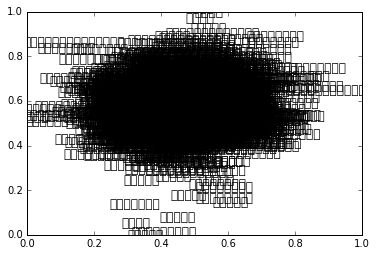

In [82]:
pos = nx.spring_layout(W)
nx.draw_networkx_labels(W,pos)
plt.show()

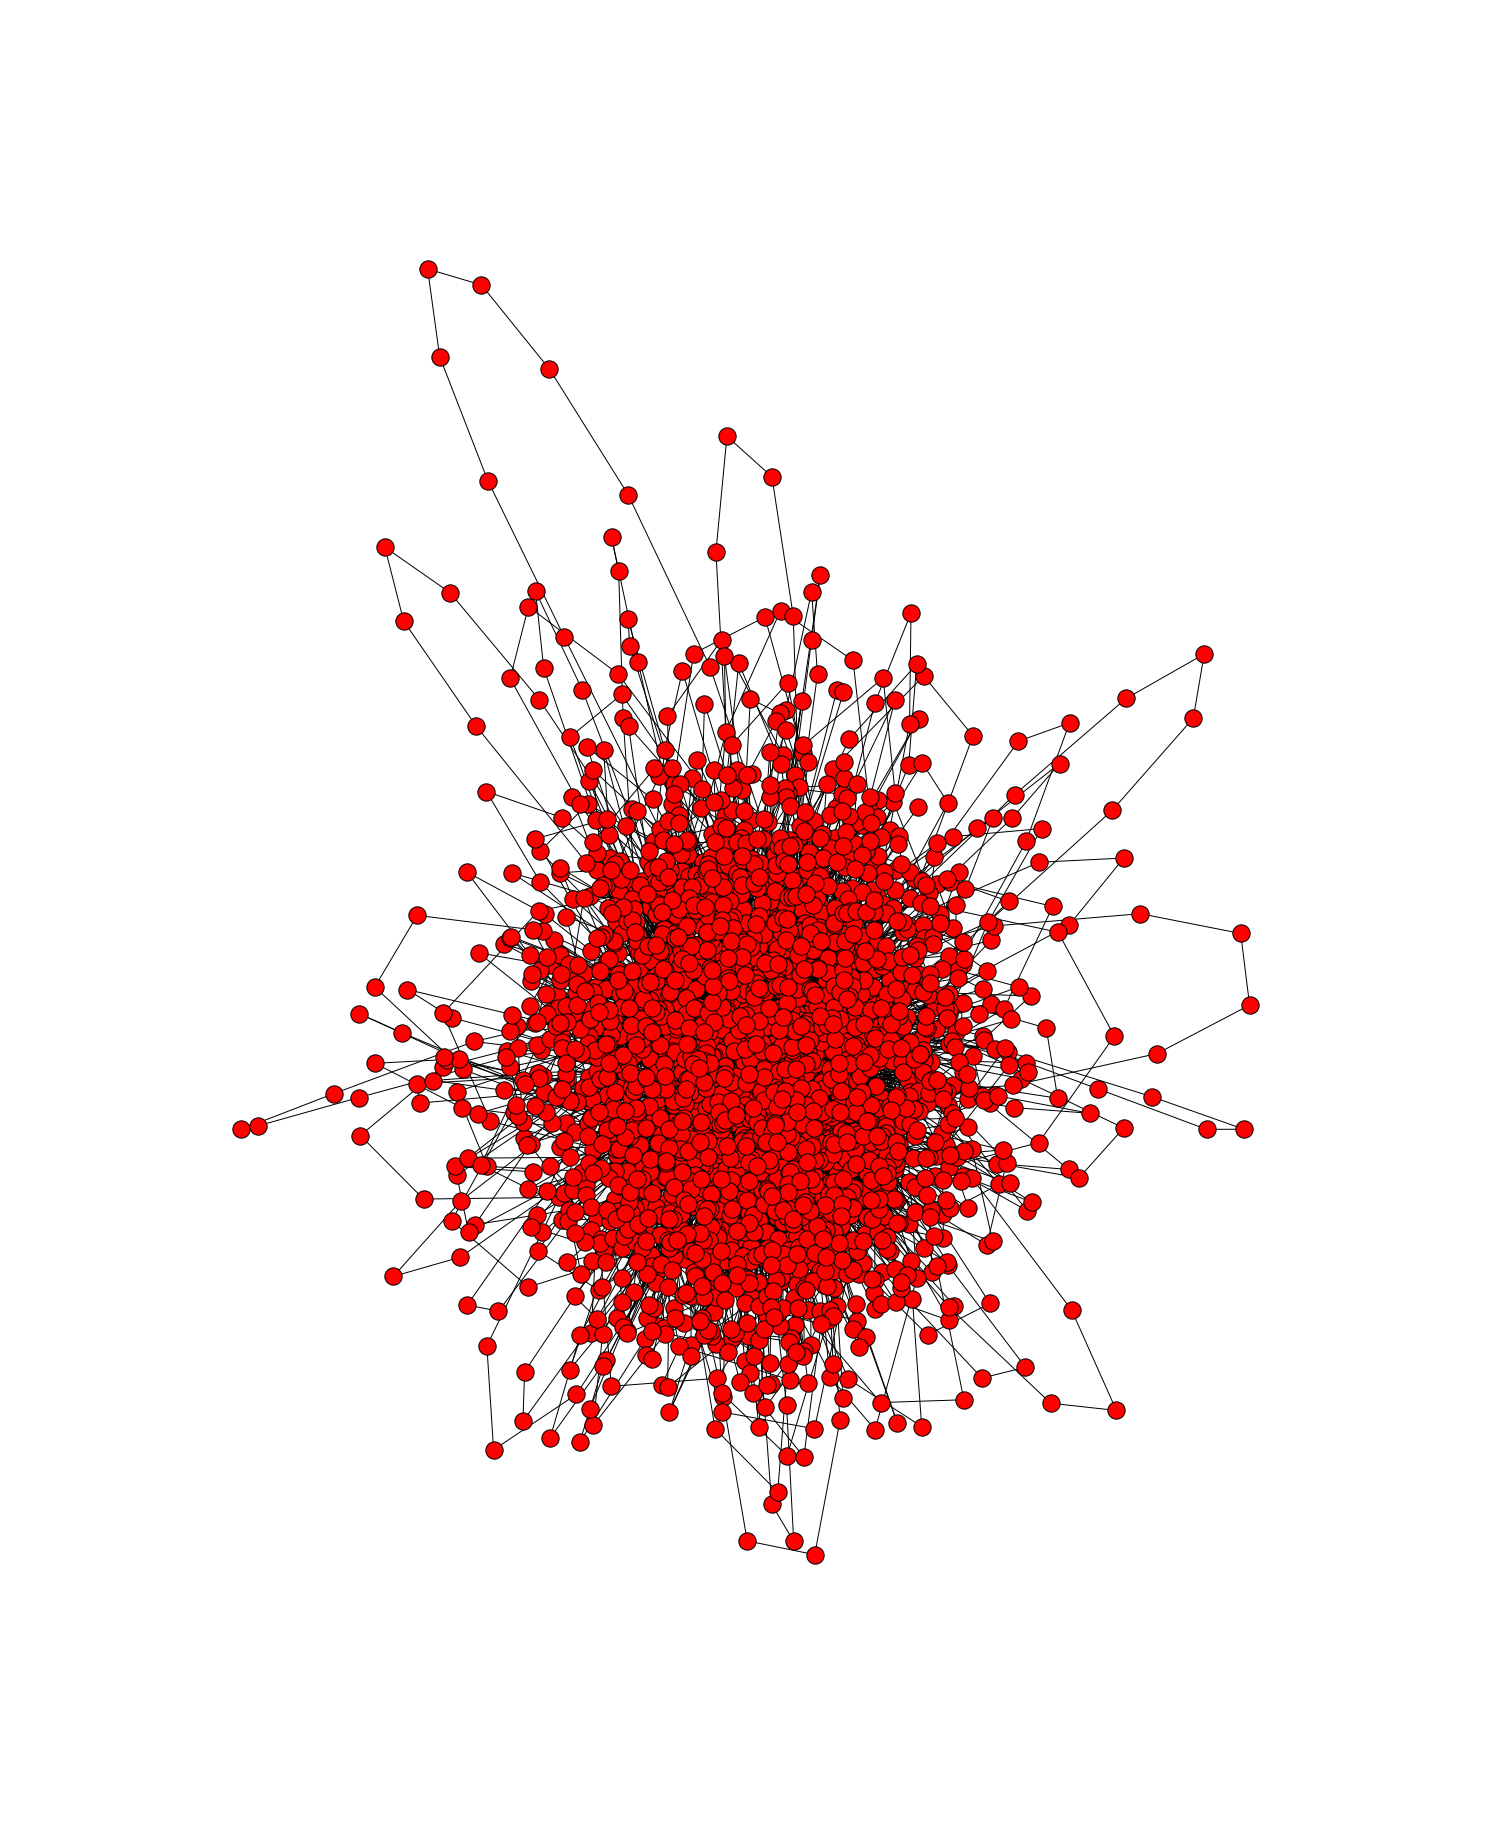

In [84]:
plt.figure(figsize=(20, 25))
nx.draw(W, with_labels = False)
plt.show()